# Visualizing using pandas

We can visualize the data in pandas' DataFrame by using `plot`.

1. We can plot a histogram of the frequency of values by using `plot.hist()`.

Note: always plot the data of a column and not of the whole dataframe, because the bars will be overwritten.



In [2]:
import pandas as pd

data = pd.DataFrame({'x': [0.75, 0.9, 0.4, 0.38, 0.41], 'y': [0.5, 0.58, 0.35, 0.32, 0.07]})
data

,x,y
0,0.75,0.50
1,0.90,0.58
2,0.40,0.35
3,0.38,0.32
4,0.41,0.07


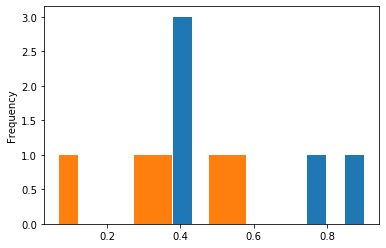

In [3]:
#plotting the data as such, columnwise, will result in a correct histogramm, adding the additional data from 'y' to the already existing plot:
data['x'].plot.hist()
data['y'].plot.hist()

#this histogram is distorted:
#data.plot.hist()

2. We can plot a scatterplot using `plot.scatter()`, plotting two column values as pairs.

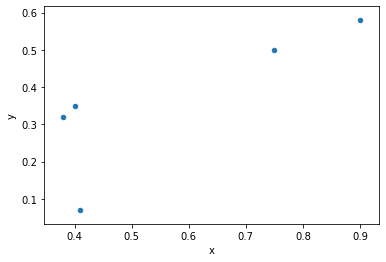

In [4]:
data.plot.scatter(x='x', y='y')

3. We can plot a bar diagram using `bar()`, plotting the two column values in bars.

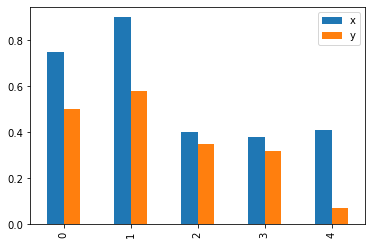

In [5]:
data.plot.bar()

# Visualizing using Seaborn

We can use the package `seaborn`, which is specialized in visualizing statistical data.

1. We can pass a pandas dataframe to `relplot()` for a scatter plot.

Alternative: `scatterplot()` works too!



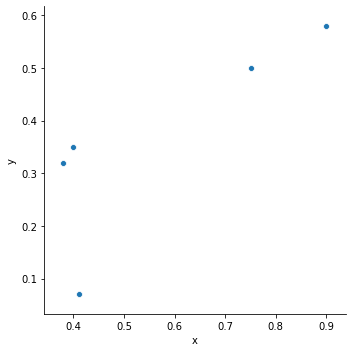

In [6]:
import seaborn as sns

#Need to specify name of dataframe and the to-be-plotted columns:
sns.relplot(x="x", y="y", data=data)


2. If dataframe consists of categorical column, we can plot the categorical affiliation by passing `hue` to the `relplot()` function.

In [7]:
data['sex'] = ['m','f', 'f', 'm', 'f']
data

,x,y,sex
0,0.75,0.50,m
1,0.90,0.58,f
2,0.40,0.35,f
3,0.38,0.32,m
4,0.41,0.07,f


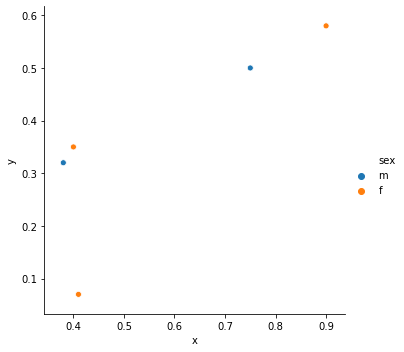

In [8]:
sns.relplot(x='x', y='y', hue='sex', data=data)

3. We can immediately draw a linear regression into the plot by using `regplot()`. It also shows the standard error, this is our confidence in the estimated slope.

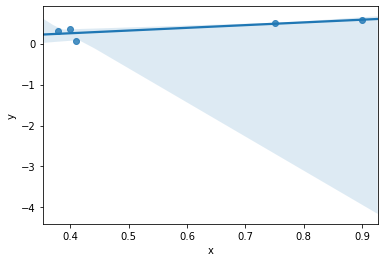

In [9]:
sns.regplot(x='x', y='y', data=data)

4. We can use `lineplot()` to plot a line.

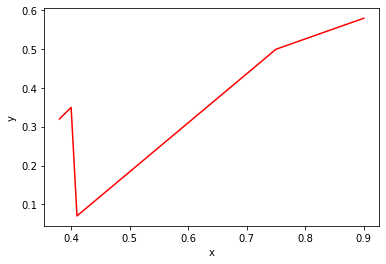

In [10]:
sns.lineplot(x='x', y='y', data=data, color='r')

5. We can use `distplot()` to plot the distribution of points.

Note: The `distplot()` function will only take iterable objects such as arrays as input.

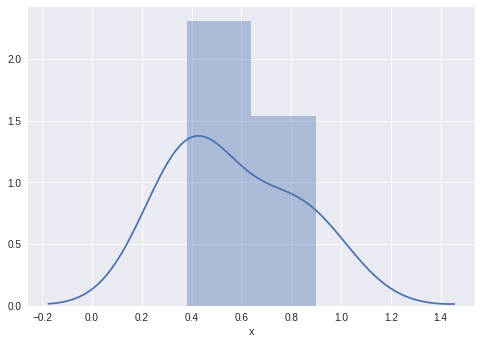

In [19]:
sns.distplot(data['x'])

# Visualizing using matplotlib

`Pandas` and `seaborn` both depend on `matplotlib`, it is a powerful, sophisticated visualization tool for controlling fine settings.

1. We can use the `scatter()` function for creating a scatter plot from a pandas dataframe.

In fact, any two iterable objects *of same length* can be used for the scatter plot, not just pandas dataframes.



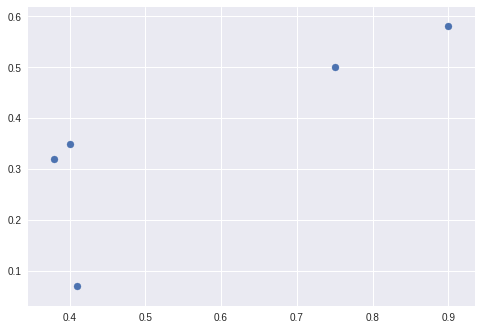

In [20]:
from matplotlib import pyplot as plt
#For "grey-background-and-guiding-lines"-style:
plt.style.use('seaborn')

plt.scatter(data['x'], data['y'])

2. We can plot a line that connects all dots using `plot()`.

The `plot()` function will automatically create an empty figure and execute the command.

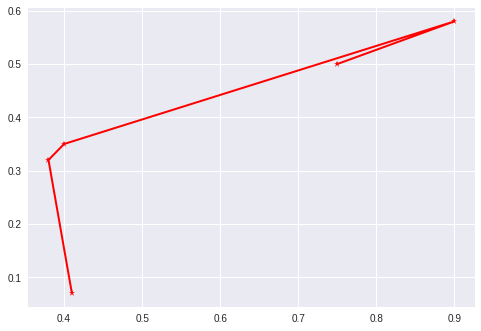

In [21]:
#Specify two data columns, colour and width of line as well as the marker style of the points:
plt.plot(data['x'], data['y'], c='r', lw=2, marker='*')

If a continous line plot is desired, then the values need to be sorted using `sort_values()`.

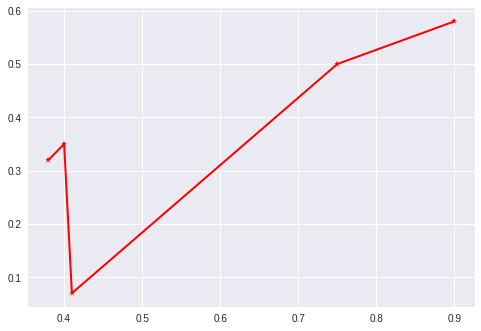

In [22]:
data_sorted = data.sort_values(by='x')
plt.plot(data_sorted['x'], data_sorted['y'], c='red', lw=2, marker='*')

#We can store the plot:
#plt.savefig('plot.jpg')

We can add axis labels by setting `xlabel()` and `ylabel()`

Text(0, 0.5, '$values_y$')

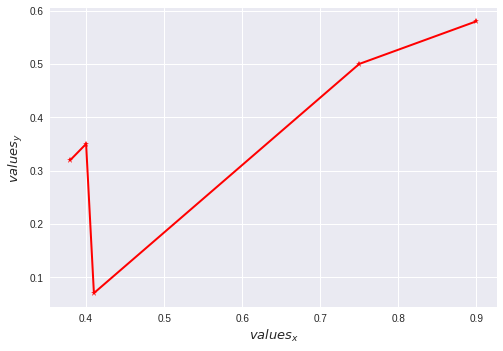

In [23]:
data_sorted = data.sort_values(by='x')
plt.plot(data_sorted['x'], data_sorted['y'], c='red', lw=2, marker='*')

plt.xlabel('$values_x$', fontsize=13)
plt.ylabel('$values_y$', fontsize=13)

3. Drawing vertical lines using `axvline()` and horizontal lines using `axhline()`.

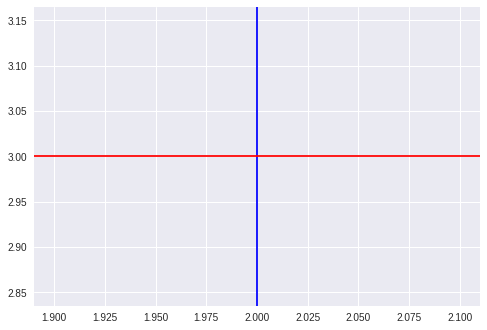

In [27]:
plt.axvline(2, c='blue')
plt.axhline(3, c='red')

## Low-level matplotlib (manually)

For a fine-grain controlling, we can manually set the plotting:

1. create `subplots()`, which returns a figure and axis.

The figure is used to control the figure as a whole, while the axis is used to control specific plots in the figure.

2. into axis, plot the data using `plot()`
3. into axis, set the title using `set_title()`
4. into axis, set the labels using `set_xlabel()` and `set_ylabel()`
5. save figure, using `savefig()`

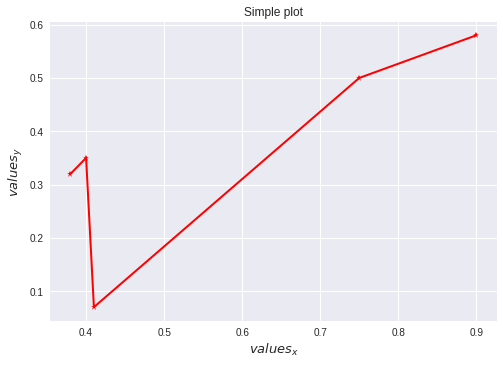

In [24]:
fig, ax = plt.subplots()
ax.plot(data_sorted['x'], data_sorted['y'], c='r', lw=2, marker='*')
ax.set_title('Simple plot')
ax.set_xlabel('$values_x$', fontsize=13)
ax.set_ylabel('$values_y$', fontsize=13)
fig.savefig('fine_plot.pdf')

We can plot multiple plots in a figure:

1. Use `subplots(nrows=2, ncols=2)` to generate a figure for 4 plots.

Note: Within `((ax1, ax2), (ax3, ax4))`, the tuples define the plots per row of the figure.

2. Add a plot to each axis with corresponding settings.


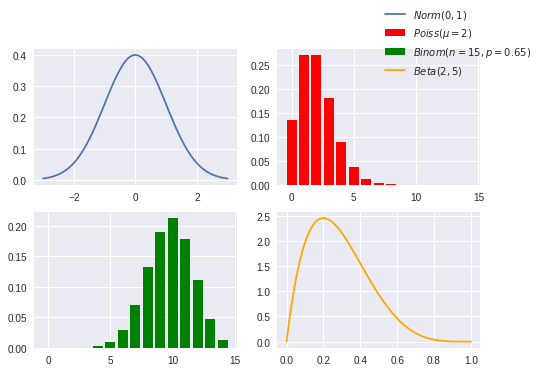

In [25]:
import numpy as np
import scipy

#array from -3 to 3, consisting of 100 equidistant elements: 
x_norm = np.linspace(-3,3,100)

#array from 0 (inclusive) to 15 (exclusive):
x_poiss = np.arange(0, 15)

#array from 0 (inclusive) to 15 (exclusive):
x_binom = np.arange(0, 15)

#array from -3 to 3, consisting of 100 equidistant elements:
x_beta = np.linspace(0,1,100)



#create 4 empty plots in figure:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

#In first plot, (line) plot density function of normal distribution and set label:
ax1.plot(x_norm, scipy.stats.norm.pdf(x_norm), label='$Norm(0,1)$')

#In second plot, (bar) plot mass function of poisson, set label and color:
ax2.bar(x_poiss, scipy.stats.poisson.pmf(x_poiss, mu=2), color='r', label='$Poiss(\mu = 2)$')

#In third plot, (bar) plot mass function of binomial, set label and color:
ax3.bar(x_binom, scipy.stats.binom.pmf(x_binom, n=15, p=0.65), color='g', label='$Binom(n=15,p=0.65)$')

#In fourth plot, (line) plot density function of beta, set label and color:
ax4.plot(x_beta, scipy.stats.beta.pdf(x_beta, a=2, b=5), color='orange', label='$Beta(2,5)$')


#Show legend in figure:
fig.legend()

#Save plot:
#fig.savefig('distributions.pdf')